# Simple Linear Regression

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Getting data

In [2]:
df = pd.read_csv('../data/Salary_Data.csv')
print(df.shape)
df.info()
df.head()

(30, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Data Exploration

# Correlation

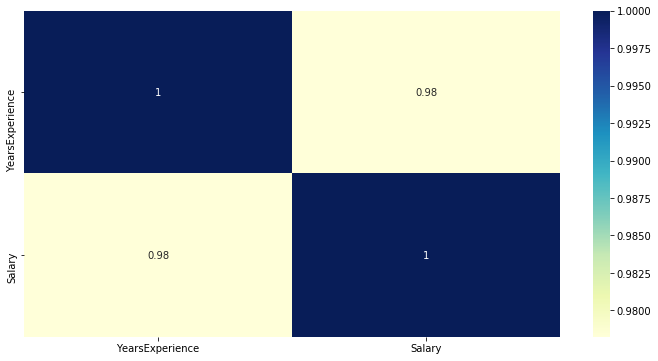

In [3]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot= True, cmap = 'YlGnBu')

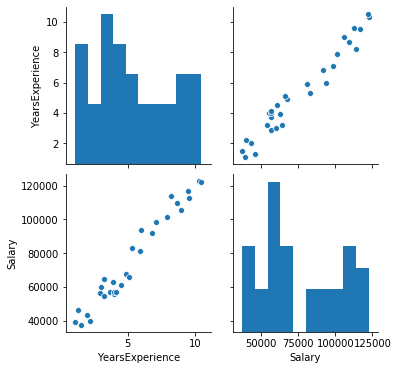

In [4]:
sns.pairplot(df)

# Visualization

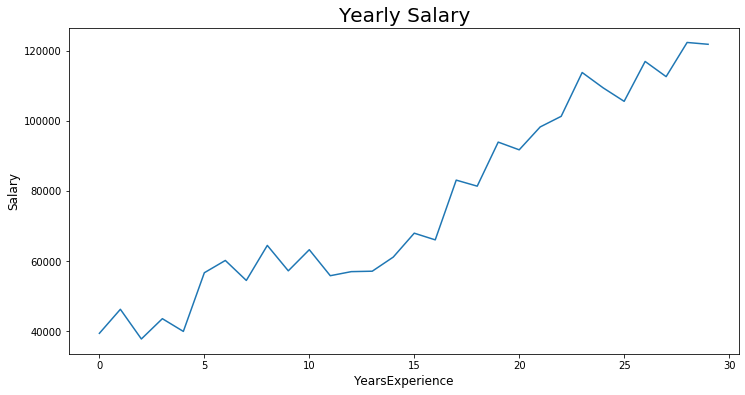

In [5]:
#lineplot
plt.figure(figsize =(12,6))
sns.lineplot(df['YearsExperience'].index, df['Salary'].values)
plt.title('Yearly Salary', fontsize=20)
plt.xlabel('YearsExperience', fontsize =12)
plt.ylabel('Salary', fontsize =12)
plt.show()

# Data Extraction (X,Y)

In [7]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1:].values

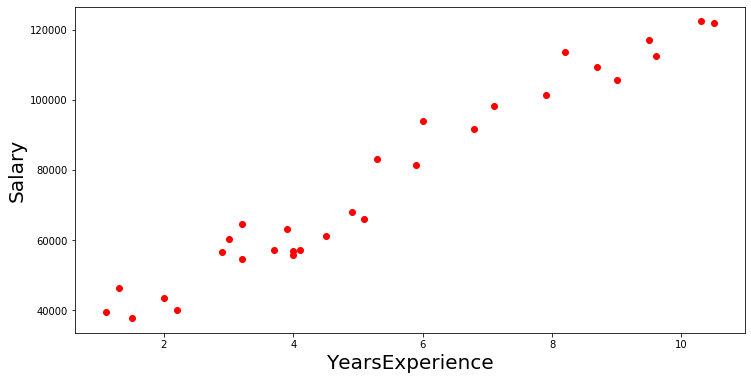

In [8]:
plt.figure(figsize =(12,6))
plt.scatter(X,y, color = 'red')
plt.xlabel('YearsExperience', fontsize = 20)
plt.ylabel('Salary', fontsize = 20)
plt.show()

# Train and Test data

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

# Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc_X = StandardScaler()

In [12]:
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [83]:
#No need to scaling the y values

# Linear Regression Model

In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
X_train

array([[ 7.9],
       [ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

In [102]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predictions

In [103]:
predictions = model.predict(X_test)

# Training Data vs prediction on X_Train data

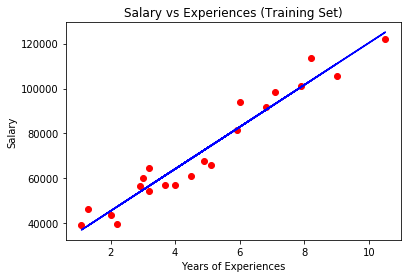

In [107]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color='blue')
plt.title('Salary vs Experiences (Training Set)')
plt.xlabel('Years of Experiences')
plt.ylabel('Salary')
plt.show()

# Y test data vs Predicted Y data

Text(0, 0.5, 'Predicted Y')

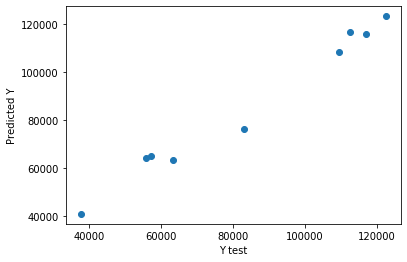

In [108]:
plt.scatter(y_test, predictions)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')

# Regression Evaluation

In [109]:
from sklearn import metrics

In [110]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Average:', y_test.mean())

MAE: 3737.4178618788987
MSE: 23370078.800832972
RMSE: 4834.260936361728
Average: 84259.77777777778
